In [66]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import os
import glob
from PIL import Image

In [106]:
class Agent():
    def __init__(self, x0, y0):
        self.x = x0
        self.y = y0
        self.xs = [x0]
        self.ys = [y0]
        
    def RandomWalk(self, steps):

        for i in range(steps):
            direction = rd.randint(1, 4)
            if direction == 1: 
                self.x += 1
                self.xs.append(self.x)
                self.ys.append(self.y)
            elif direction == 2: 
                self.x -= 1
                self.xs.append(self.x)
                self.ys.append(self.y)
            elif direction == 3: 
                self.y += 1
                self.ys.append(self.y)
                self.xs.append(self.x)
            else: 
                self.y -= 1
                self.ys.append(self.y)
                self.xs.append(self.x)
    
    def PlotTrajectory(self):
        
        try:
            os.makedirs('animation')
        except FileExistsError:
            files = glob.glob('animation/*')
            for f in files:
                os.remove(f)
                
        xs = self.xs
        ys = self.ys
        
        plt.scatter(xs[0], ys[0], c='green')
        plt.xlim([min(xs)-0.1*min(xs), max(xs)+0.1*max(xs)])
        plt.ylim([min(ys)-0.1*min(ys), max(ys)+0.1*max(ys)])
        plt.savefig('animation/0.png')
        
        for i in range(1, len(xs)):
            plt.plot(xs[:i+1], ys[:i+1], color='black')
            plt.savefig(f'animation/{i}.png')
        
        plt.scatter(xs[-1], ys[-1], c='red')
        plt.savefig(f'animation/{len(xs)}.png')
        
        g = glob.glob('animation/*.png')
        g_sorted = [f'animation\\{j}.png' for j in range(len(g))]
        frames = [Image.open(image) for image in g_sorted]
        frame_one = frames[0]
        frame_one.save('animation/trajectory.gif', format='GIF', append_images=frames,
            save_all=True, duration=200, disposal=1)
        
        files = glob.glob('animation/*.png')
        for f in files:
            os.remove(f)

In [107]:
a = Agent(50, 50)

In [108]:
a.RandomWalk(100)

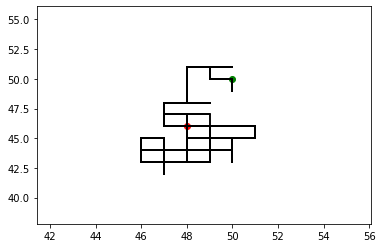

In [109]:
a.PlotTrajectory()